Created on Sat Jan 16 15:59:59 2021

#@author: Mücahit Öztürk - 160504034

#Doğal Dil İşlemeye Giriş Dersi
#Bütünleme Sınavı Ödevi 5.Soru

Eldeki şiir verilerinden yeni şiirler üreten veri setine yeni bir veri eklendiğinde herhangi bir değişikliğe gerek kalmadan çalışmaya devam eden dinamik bir uygulama geliştirdim.

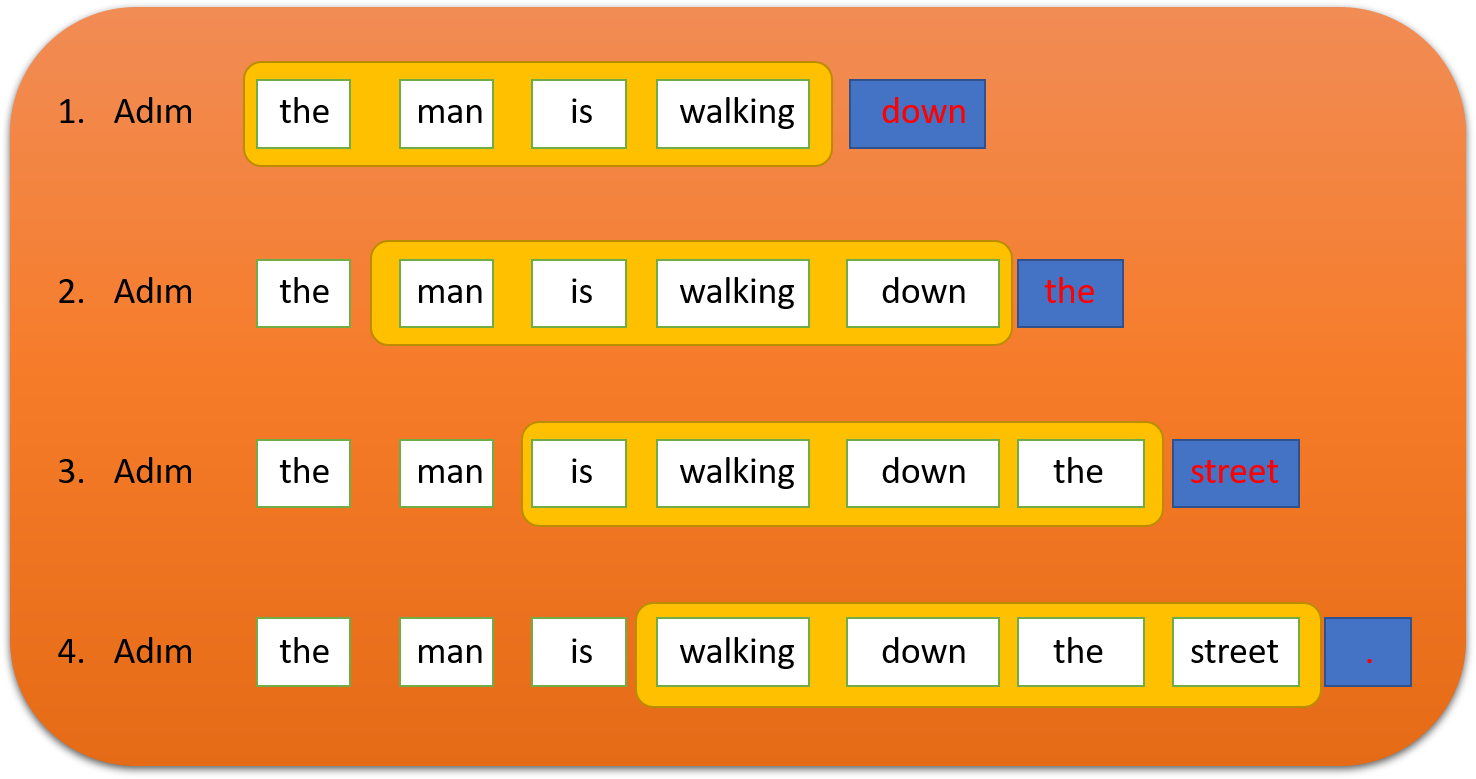

# **-  1. Aşama: Veri setinizi programlama diline nasıl aktardınız.**

In [ ]:
# İhtiyacımız olabilecek bazı önemli ve gerekli python kütüphanelerini import ediyoruz.
import tensorflow as tf
import string
import requests # Verileri internetten çekmek için gerekli kütüphane
import pandas as pd

In [ ]:
# Şiir verilerini github da aradığım özelliklere sahip bir şekilde buldum ve response ile projeye dahil ettim.
response = requests.get('https://raw.githubusercontent.com/mucahitozturk/poetry-data/master/eng-siir-data.txt')

In [ ]:
# Verileri data değişkenimize çekiyorum.
data = response.text.splitlines()

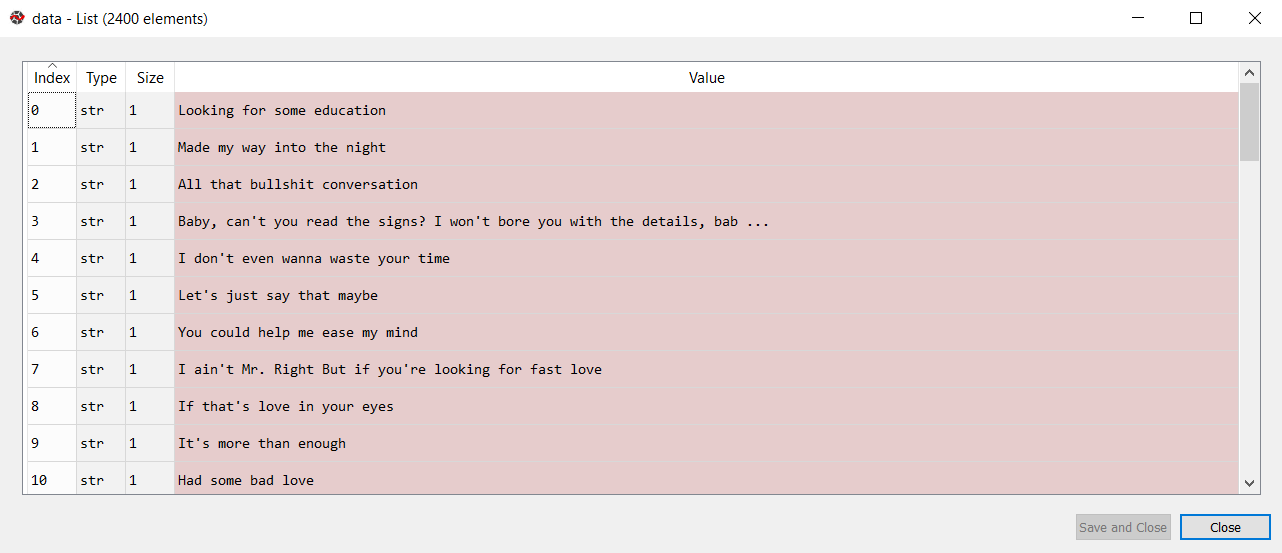

In [ ]:
len(data) # Kaç satır olduğunu buluyoruz.

2410

In [ ]:
# Veri setimizde kaç kelime olduğunu hesaplıyoruz.
len(" ".join(data))

91751

In [ ]:
# LSTM Modelini ve X, Y belirteçlerini hazırlamadan önce ilgili kütüphaneleri projemize import ediyoruz.
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer # sayısallaştırma için kullanacağımız kütüphane
from tensorflow.keras.utils import to_categorical # kategorik olarak içe aktarmada kullanıyoruz. 0-1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding # LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences # küçük büyük fark etmeksizin dizileri ayrıştırmak için

#**-  2. Aşama: Veri setine uyguladığınız ön işleme algoritmasını açıklayınız.**

Sıradaki adım, metin verisini ön işlemeye sokmak ve modelimiz için hazır hale getirmek,

-Dosyamızı okuduktan sonra tüm metni küçük harflere çevirmeli, ve kelimelerine ayırmalıyız. Ayrıca noktalama işaretlerinden kurtulmalıyız.

-91330 kelimelik bir veri setinden 1396 benzersiz verisetine sahip olduğumuzu göreceğiz.

#**-  3. Aşama:  Veri setini nasıl sayısallaştırdınız.**

-Her kelimeye karşılık bir sayı ve aynı şekilde her sayıya karşılık bir kelime şeklinde bir haritalama işlemi uygulayacağız.

In [ ]:
# Verilerimizdeki büyük-küçük harf ayrımını kaldırıyoruz.
# Verilerimizi kelimeler halinde parçalama
# Noktalama işaretlerinin arındırılması

token = Tokenizer() # Tokenimizi oluşturuyoruz. 
token.fit_on_texts(data) # Her kelimeyi bir diziye kaydediyoruz.

#token.word_counts # Bir kelimeden metin verimizde kaçtane olduğunu bulmaya yarıyor.
#help(token) # Şifrelemede kullanabileceğimiz yöntemleri gözlemleyebiliriz.

In [ ]:
token.word_index # Hangi kelimenin kaçıncı diziye tekabul ettiğini görüyoruz.

{'i': 1,
 'you': 2,
 'the': 3,
 'me': 4,
 'to': 5,
 'it': 6,
 'and': 7,
 'my': 8,
 'your': 9,
 'that': 10,
 'love': 11,
 'of': 12,
 'in': 13,
 'we': 14,
 'all': 15,
 'a': 16,
 "i'm": 17,
 'when': 18,
 'but': 19,
 'be': 20,
 'for': 21,
 'so': 22,
 "don't": 23,
 'never': 24,
 "you're": 25,
 'let': 26,
 'if': 27,
 'is': 28,
 'know': 29,
 'up': 30,
 'go': 31,
 'down': 32,
 'will': 33,
 'on': 34,
 'just': 35,
 'do': 36,
 "ain't": 37,
 'heart': 38,
 'like': 39,
 'with': 40,
 'baby': 41,
 'this': 42,
 "it's": 43,
 'want': 44,
 "i've": 45,
 'no': 46,
 'say': 47,
 'as': 48,
 'had': 49,
 'make': 50,
 'can': 51,
 'out': 52,
 'ooh': 53,
 'was': 54,
 "can't": 55,
 'one': 56,
 'time': 57,
 'what': 58,
 'are': 59,
 'feel': 60,
 'see': 61,
 "i'll": 62,
 'fall': 63,
 'there': 64,
 'were': 65,
 'gonna': 66,
 'oh': 67,
 'more': 68,
 'have': 69,
 "won't": 70,
 'back': 71,
 'face': 72,
 'yeah': 73,
 'at': 74,
 "'cause": 75,
 'only': 76,
 'been': 77,
 'stand': 78,
 'way': 79,
 'ready': 80,
 'take': 81,
 'ha

In [ ]:
encoded_text = token.texts_to_sequences(data) # Metin verilerimiz kodlandı ve sayısallaştırıldı.
encoded_text # Verileri şifrelenmiş bir şekilde yazdırdım.

[[328, 355, 14, 69, 67, 328, 355, 168, 606],
 [517, 3, 79],
 [13, 42, 518, 607, 2, 55, 255, 9, 392],
 [22, 728, 9, 162, 1, 927, 46, 608, 46, 219],
 [46, 608, 46, 219],
 [928, 329, 929, 23, 729, 46, 162],
 [46, 608, 46, 219, 135, 135, 135, 1, 177, 18, 16, 14, 393, 5, 519],
 [13, 3, 730, 930, 13, 931],
 [7, 86, 932, 156, 50, 3, 157, 129],
 [48, 6, 54, 933, 934, 130, 3, 935],
 [256, 21, 220, 731],
 [117, 8, 79, 154, 3, 136],
 [15, 10, 732, 733],
 [41, 55, 2, 609, 3, 734, 1, 70, 520, 2, 40, 3, 521, 41],
 [1, 23, 107, 190, 300, 9, 57],
 [286, 35, 47, 10, 231],
 [2, 83, 137, 4, 522, 8, 120],
 [1, 37, 523, 102, 19, 27, 25, 256, 21, 330, 11],
 [27, 209, 11, 13, 9, 124],
 [43, 68, 210, 125],
 [49, 220, 449, 11],
 [22, 330, 11, 28, 15, 10, 45, 221, 34, 8, 120, 53, 53],
 [53, 53, 256, 21, 220, 735],
 [117, 8, 79, 154, 3, 287],
 [8, 355, 221, 524, 736],
 [7, 331, 15, 525, 737],
 [1, 35, 190, 69, 220, 526, 1, 70, 520, 2, 40, 3, 521, 41],
 [1, 23, 107, 190, 300, 9, 57],
 [286, 35, 47, 10, 231],
 [2,

In [ ]:
# Örnek olması için şöyle bir şey yapalım...
x = ['i love you']
token.texts_to_sequences(x)

[[1, 11, 2]]

In [ ]:
vocab_size = len(token.word_counts) + 1 # Verilen kelimenin de benzersiz kelimelere dahil olabileceği için +1 büyük tutuyoruz
vocab_size

1406

#**-  4. Aşama: LSTM ağını (veya modelini) nasıl oluşturdunuz ve eğittiniz.**

# **- 5. Aşama: LSTM ağını (veya modelini) nasıl test ettiniz.**

In [ ]:
# Verileri eğitim için hazırlıyorum - Prepare Training Data
# Ele aldığımız proje gereği girdi olarak aldığımız bütün veriyi geri verecek şekilde modeli oluşturmalıyız.
# Bu nedenden dolayı verilerimizi eğitim veya test amaçlı bölmüyor hepsini eğitim için kullanıyoruz.
# En baştaki görsel buradaki adımlara örnektir.

datalist = [] # Verilerimiz için boş bir liste oluşturuyoruz.
for d in encoded_text: #2400 satır veriyi şifreleme yapılmış halde çekiyoruz.
    if len(d)>1: # Tek kelimeden oluşan bir çok satır var, bunları ön işleme sırasında fark etmiştim sağlıklı bir eğitim için bunları dahil etmemeliyiz onun için '>1' kullanıyoruz
        for i in range(2, len(d)): # Eğitime ilk iki eleman ile başlaması gerektiğini söylüyoruz
            datalist.append(d[:i])
            print(d[:i])

Görüntülenen çıkış son 5000 satıra kısaltıldı.
[197, 203, 442, 16, 1178]
[27, 6]
[27, 6, 218]
[27, 6, 218, 77]
[27, 6, 218, 77, 27]
[27, 6, 218, 77, 27, 6]
[27, 6, 218, 77, 27, 6, 218]
[27, 6, 218, 77, 27, 6, 218, 77]
[27, 6, 218, 77, 27, 6, 218, 77, 21]
[27, 6]
[27, 6, 218]
[27, 6, 218, 77]
[27, 6, 218, 77, 27]
[27, 6, 218, 77, 27, 6]
[27, 6, 218, 77, 27, 6, 218]
[27, 6, 218, 77, 27, 6, 218, 77]
[27, 6, 218, 77, 27, 6, 218, 77, 21]
[27, 6, 218, 77, 27, 6, 218, 77, 21, 11]
[27, 6]
[27, 6, 218]
[27, 6, 218, 77]
[27, 6, 218, 77, 27]
[27, 6, 218, 77, 27, 6]
[27, 6, 218, 77, 27, 6, 218]
[27, 6, 218, 77, 27, 6, 218, 77]
[27, 6, 218, 77, 27, 6, 218, 77, 21]
[27, 6, 218, 77, 27, 6, 218, 77, 21, 11]
[27, 6, 218, 77, 27, 6, 218, 77, 21, 11, 688]
[27, 6, 218, 77, 27, 6, 218, 77, 21, 11, 688, 131]
[27, 6, 218, 77, 27, 6, 218, 77, 21, 11, 688, 131, 8]
[27, 6, 218, 77, 27, 6, 218, 77, 21, 11, 688, 131, 8, 160]
[27, 6, 218, 77, 27, 6, 218, 77, 21, 11, 688, 131, 8, 160, 244]
[27, 6, 218, 77, 27, 6, 2

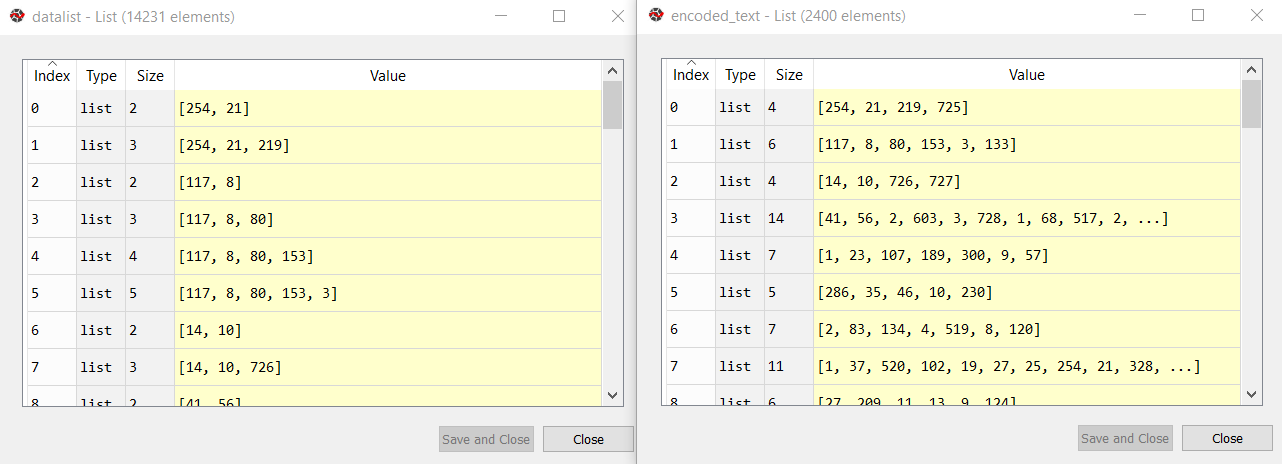

In [ ]:
# Oluşturacağımız model için verilerimizi aynı boyuta getirmemiz gerekiyor, Bu durumda padding metodunu kullanırız.

max_length = 20 # Metin verilerinin maksimum uzunluğu
sequences = pad_sequences(datalist, maxlen=max_length, padding='pre') # Giriş verisini 20 veriye eşitlicez bu sayede giriş de eşitlenmiş olacak.
sequences #.shape - ile uzunluğunu gözlemleriz

array([[  0,   0,   0, ...,   0, 328, 355],
       [  0,   0,   0, ..., 328, 355,  14],
       [  0,   0,   0, ..., 355,  14,  69],
       ...,
       [  0,   0,   0, ...,  17, 198,  17],
       [  0,   0,   0, ..., 198,  17, 198],
       [  0,   0,   0, ...,  17, 198,   6]], dtype=int32)

In [ ]:
X = sequences[:, :-1] # Sequences daki girdilerimizin son sütununu girdi olarak görmemesini sağlıyoruz :, :-1 ifadesiyle son satıra kadar olan bütün veriler al anlamına gelir.çünkü sondakini tahmin edeceğiz ve ondan sonrası yok
y = sequences[:, -1] # y ile sadece son satırları alıyoruz. 

In [ ]:
vocab_size # Birbirinden farklı, benzersiz kelimelerin sayısını alıyoruz.

# Deep Learning Modellerine ve LSTM’e vermeden önce;

y = to_categorical(y, num_classes=vocab_size) # 0-1 şeklinde kategori haline çeviriyoruz 
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
seq_length = X.shape[1] #dizilerimizin uzunluğunu hafızaya alıyoruz - 19
seq_length

19

In [ ]:
#Modelimi oluştururken bir embedding katmanı iki lstm katmanı ve bir çıkış katmanı kullandım. 
#Çıkış katmanımda çok sınıflı bir veri kullandığım için aktivasyon fonksiyonu olarak softmax foksiyonunu kullandım. 
#Daha sonra loss fonksiyonu olarak categorical crossentropy ve optimizasyon algoritması olarak Adam algoritmasını, 
#metric olarak da accuracy kullandım.

#Elimizdeki verilere göre aşağıdaki gibi bir ağ yapısı oluşturdum, kalite değişimini gözlemlemek için yapıda düzenlemeler yapabiliriz.

model = Sequential() #sıralı katmanımızı alıyoruz
model.add(Embedding(vocab_size, 50, input_length=seq_length))

In [ ]:
model.add(LSTM(100, return_sequences=True)) #bu hücrenin çıktısı onu sonraki hücrede tekrar edecek
model.add(LSTM(100)) # lstm barındırıyoruz
model.add(Dense(100, activation='relu')) #relu aktivasyon fonksiyonunu dahil ediyoruz.
model.add(Dense(vocab_size, activation='softmax')) #softmax aktivasyon fonksiyonunu dahil ediyoruz.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 19, 50)            70300     
_________________________________________________________________
lstm_2 (LSTM)                (None, 19, 100)           60400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1406)              142006    
Total params: 363,206
Trainable params: 363,206
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Eğitimin her yinelemesinin kaybını hesaplamak için, kategorik çapraz entropiyi kullanacağız. 
#Ve ağımızı optimize etmek için, adam optimizasyonunu, 
#Tekrarlayan sinir ağları için genellikle çok iyi bir seçenek olduğundan kullanıyor olucam.

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Doğruluk ve kayıp hesaplamaları
model.fit(X, y, batch_size=32, epochs=50) # 32 şerli paketler halinde 50 kere veri seti eğitilecek

Epoch 1/50
447/447 [==============================] - 5s 7ms/step - loss: 0.8045 - accuracy: 0.7858
Epoch 2/50
447/447 [==============================] - 3s 7ms/step - loss: 0.7756 - accuracy: 0.7950
Epoch 3/50
447/447 [==============================] - 3s 7ms/step - loss: 0.7651 - accuracy: 0.7997
Epoch 4/50
447/447 [==============================] - 3s 7ms/step - loss: 0.7324 - accuracy: 0.7995
Epoch 5/50
447/447 [==============================] - 3s 7ms/step - loss: 0.7448 - accuracy: 0.8007
Epoch 6/50
447/447 [==============================] - 3s 7ms/step - loss: 0.7573 - accuracy: 0.7926
Epoch 7/50
447/447 [==============================] - 3s 7ms/step - loss: 0.7336 - accuracy: 0.8025
Epoch 8/50
447/447 [==============================] - 3s 7ms/step - loss: 0.7168 - accuracy: 0.8046
Epoch 9/50
447/447 [==============================] - 3s 7ms/step - loss: 0.7089 - accuracy: 0.8052
Epoch 10/50
447/447 [==============================] - 3s 7ms/step - loss: 0.7190 - accuracy: 0.8014

In [ ]:
#ÜRETİM AŞAMASI

poetry_length=10 # Şiirimde bir satırda kaç kelime istediğimi söylüyorum

# Şiir üretecek işlevi giriyoruz ayrıca, girdi modelini de belirtiyoruz.
# Oluşturulan metni seed_text e iletip kaç satır olacağı bilgisini n_lines ile alıyoruz.

def generate_poetry(seed_text, n_lines): # Kullanıcıdan yorumlanması istenen kelime ve satır sayısı alınıyor
    for i in range(n_lines): # Kullanıcıdan alacağımız şiir satır sayısı kadar çalışacak
        text = []
        for _ in range(poetry_length): # Bir satırda kaç kelime olacağını söyledik.
            encoded = token.texts_to_sequences([seed_text]) # seed_text ile alınan verinin dizi numarasını encoded değişkenine yazıyoruz.
            encoded = pad_sequences(encoded, maxlen=seq_length, padding='pre') # 19 a eşit seq_length - dolgu yapılıyor
            
            y_pred = np.argmax(model.predict(encoded), axis=-1) # Tahminleme için kullanıyoruz - encoded ekseninde bu işlem gerçekleşiyor
            
            predicted_word = ""
            for word, index in token.word_index.items(): # Kelimeler ile birlikte tokenleri çekiyoruz.
                if index == y_pred: # Tahmin edilen kelime olarak kullanılıyor
                  predicted_word = word
                  break
                
            seed_text = seed_text + ' ' + predicted_word # Tahmin edilen kelimeyi metine ekliyoruz.
            text.append(predicted_word)
            
        seed_text = text[-1]
        text = ' '.join(text) # Tahmin edilen kelimeleri metin haline getiriyoruz.
        print(text) # Tahmin edilen metni yazdırıyoruz.

# **- 6. Aşama: LSTM ağını (veya modeline) yeni veri girişlerini nasıl yaptınız ve sonuçlarınız.**

In [ ]:
seed_text = 'darling' # üretilecek şiirimizin içinde olmasını istediğimiz metin
generate_poetry(seed_text, 5)

this is goodbye cautious if you're and i just wanna
try to testify in a of every little out of
the right things without a fool in my heart and
i can know by the way you treat your breaking
your stone through every open door come on of my


-Sadece bir şairin şiirlerini aldık bu verinin kapsamını genişletirsek daha güzel ve doğru sonuçlar elde edebiliriz.

-Verisetini githubıma dahil ettiğim için yeni veri eklerken text dosyamın altına yeni veriyi ekliyorum.

# Teşekkürler